# Johnson & Johnson Quarterly Earnings per Share Analysis

This notebook replicates Figure 1.1 from the book "Time Series Analysis and Its Applications: With R Examples" by Shumway and Stoffer. It loads quarterly earnings data for Johnson & Johnson, transforms the date information, and plots the series on both linear and logarithmic scales.

The data is sourced from a JSON file, representing the `jj` time series commonly used in time series analysis examples.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
from typing import Union, Literal, cast

from pathlib import Path

# --- File Path Configuration ---
json_file_path: Path = Path("../data/raw/jj_data.json")

## Data Loading and Initial Inspection

We begin by loading the JSON data into a pandas DataFrame and inspecting its initial structure and data types.

In [2]:
# Load the JSON file into a pandas DataFrame.
# The explicit typ='frame' and type: ignore are used to help type checkers
# like MyPy and Pylance with complex pandas DataFrame inference.
df_jj: pd.DataFrame = cast(
    pd.DataFrame,
    pd.read_json(json_file_path, typ="frame"),  # type: ignore
)

print("--- Initial DataFrame Head ---")
print(df_jj.head()) # In a notebook, this will display as a formatted table
print("\n--- Initial DataFrame Info ---")
# The 'None' output after df_jj.info() is normal, as info() prints directly and returns nothing.
print(df_jj.info())

--- Initial DataFrame Head ---
   Year  Quarter  Value
0  1960        1   0.71
1  1960        2   0.63
2  1960        3   0.85
3  1960        4   0.44
4  1961        1   0.61

--- Initial DataFrame Info ---
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 84 entries, 0 to 83
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Year     84 non-null     int64  
 1   Quarter  84 non-null     int64  
 2   Value    84 non-null     float64
dtypes: float64(1), int64(2)
memory usage: 2.1 KB
None


## Date Column Construction and Indexing

The raw JSON data contains 'Year' and 'Quarter' columns, rather than a single 'Date' column. To prepare the data for time series analysis, we need to construct a proper `DatetimeIndex` from these columns.

We will:
1.  Combine 'Year' and 'Quarter' into a string format (e.g., "1960Q1").
2.  Convert this string into a `pandas.PeriodIndex` to correctly interpret the quarterly periods.
3.  Transform the `PeriodIndex` into a `pandas.DatetimeIndex`, setting the date to the start of each respective quarter.
4.  Finally, set this new 'Date' column as the DataFrame's index and extract the 'Value' column into a `pandas.Series`.

In [3]:
# Step 1: Create a string representation of the quarter (e.g., '1960Q1')
df_jj['Date'] = df_jj['Year'].astype(str) + 'Q' + df_jj['Quarter'].astype(str)

# Step 2: Convert the string 'Date' column into a pandas DatetimeIndex.
# pd.PeriodIndex converts 'YYYYQ Q' strings into Period objects,
# and .to_timestamp() converts these periods to the start of their respective timestamps.
df_jj['Date'] = pd.PeriodIndex(df_jj['Date'], freq='Q').to_timestamp()

# Step 3: Set the newly created 'Date' column as the DataFrame's index.
# The 'Value' column will be extracted into a pandas Series.
# The type: ignore is kept here if type checkers like MyPy/Pylance struggle with
# inferring the exact type of the Series after chaining set_index and column selection.
jj_series: "pd.Series[float]" = df_jj.set_index('Date')['Value'] # type: ignore

print("--- Pandas Series with DatetimeIndex (Head) ---")
print(jj_series.head()) # This will display as a formatted Series output
print("\n--- Pandas Series Index ---")
# # noqa comments are used to suppress specific Pylance warnings on this line if they appear.
print(jj_series.index) # noqa: reportUnknownMemberType, reportUnknownArgumentType

--- Pandas Series with DatetimeIndex (Head) ---
Date
1960-01-01    0.71
1960-04-01    0.63
1960-07-01    0.85
1960-10-01    0.44
1961-01-01    0.61
Name: Value, dtype: float64

--- Pandas Series Index ---
DatetimeIndex(['1960-01-01', '1960-04-01', '1960-07-01', '1960-10-01',
               '1961-01-01', '1961-04-01', '1961-07-01', '1961-10-01',
               '1962-01-01', '1962-04-01', '1962-07-01', '1962-10-01',
               '1963-01-01', '1963-04-01', '1963-07-01', '1963-10-01',
               '1964-01-01', '1964-04-01', '1964-07-01', '1964-10-01',
               '1965-01-01', '1965-04-01', '1965-07-01', '1965-10-01',
               '1966-01-01', '1966-04-01', '1966-07-01', '1966-10-01',
               '1967-01-01', '1967-04-01', '1967-07-01', '1967-10-01',
               '1968-01-01', '1968-04-01', '1968-07-01', '1968-10-01',
               '1969-01-01', '1969-04-01', '1969-07-01', '1969-10-01',
               '1970-01-01', '1970-04-01', '1970-07-01', '1970-10-01',
              

## Time Series Plotting (Equivalent to R's `tsplot`)

Now that the data is correctly structured as a time series, we can plot it. We'll create two plots side-by-side: one with a linear Y-axis and another with a logarithmic Y-axis, mirroring the example from the textbook.

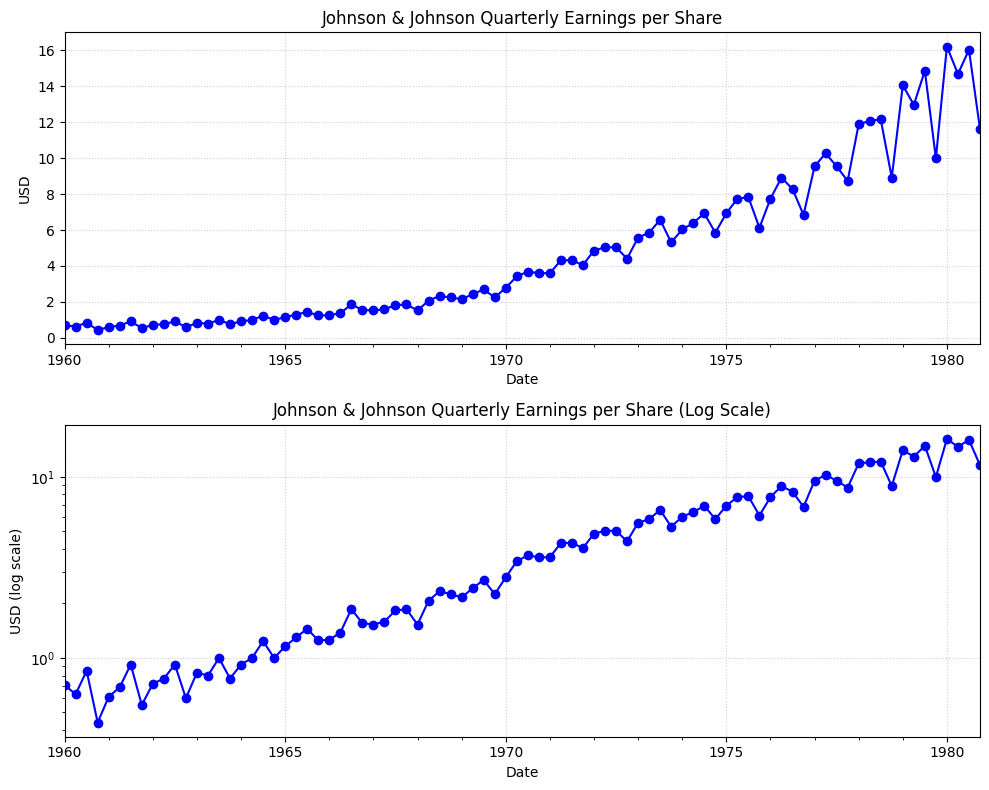

In [4]:
# Create a figure and a set of subplots.
# mfrow=2:1 in R is equivalent to (2, 1) in plt.subplots().
fig, axes = plt.subplots(2, 1, figsize=(10, 8)) # figsize=(width, height) in inches

# --- Plot 1: Linear Scale ---
jj_series.plot(
    ax=axes[0],          # Plot on the first subplot
    color='blue',        # Line color (similar to R's col=4)
    marker='o',          # Add markers for each point (similar to R's type="o")
    linestyle='-',       # Connect markers with a line
    title="Johnson & Johnson Quarterly Earnings per Share",
    ylabel="USD"
)
axes[0].grid(True, linestyle=':', alpha=0.6) # Add a grid for better readability

# --- Plot 2: Logarithmic Scale ---
jj_series.plot(
    ax=axes[1],          # Plot on the second subplot
    color='blue',        # Line color
    marker='o',          # Add markers
    linestyle='-',
    title="Johnson & Johnson Quarterly Earnings per Share (Log Scale)", # Descriptive title
    ylabel="USD (log scale)",
    logy=True            # Set y-axis to logarithmic scale (equivalent to R's log="y")
)
axes[1].grid(True, linestyle=':', alpha=0.6) # Add a grid

# Adjust subplot parameters for a tight layout, preventing labels/titles from overlapping
plt.tight_layout()

# Display the plots (in a notebook, this is often implicitly handled by the last line)
plt.show()